In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data
import time
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [5]:
#Set the value of the Parameters
learning_rate, epoches, batch_size = 0.01, 20, 256
num_batches=mnist.train.num_examples/batch_size
input_height, input_width, n_classes, dropout= 28, 28, 10, 0.75
display_step, filter_height, filter_width= 1, 5, 5
depth_in, depth_out1, depth_out2=1, 64, 128

In [14]:
# input/output definition
x=tf.placeholder(tf.float32, [None, 28*28])
y=tf.placeholder(tf.float32, [None, n_classes])
keep_prob=tf.placeholder(tf.float32)

weights={
    'Wc1': tf.Variable(tf.random_normal([filter_height, filter_width, depth_in, depth_out1])), 
    'Wc2': tf.Variable(tf.random_normal([filter_height, filter_width, depth_out1, depth_out2])),
    'wd1': tf.Variable(tf.random_normal([7*7*depth_out2, 1024])),
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases={
    'bc1': tf.Variable(tf.random_normal([64])),
    'bc2': tf.Variable(tf.random_normal([128])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [18]:
# create different layers
# Create Convolution-RELU-Maxpool Network.
def conv2d(x, W, b, strides=1, stride=2):
    x=tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x=tf.nn.bias_add(x, b)
    x=tf.nn.relu(x)
    x=tf.nn.max_pool(x, ksize=[1, stride, stride, 1], strides=[1, stride, stride, 1], padding='SAME')
    return x


In [20]:
# Create Feed Forward network model\
def conv_net(x, weights, biases, dropout):
    x=tf.reshape(x, shape=[-1, 28, 28, 1])
    # from convolution layer
    conv1=conv2d(x, weights['Wc1'], biases['bc1'])
    conv2=conv2d(conv1, weights['Wc2'], biases['bc2'])
    # from fully connected layer
    fc1=tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1=tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1=tf.nn.relu(fc1)
    # apply dropout
    fc1=tf.nn.dropout(fc1, dropout)
    # output classes
    out=tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [21]:
# defining the tensorflow OPs for different activites
pred=conv_net(x, weights, biases, keep_prob)
# define loss function
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
# Evaluate model:
correct_pred=tf.equal(tf.argmax(pred, 1), tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# initializing all variables
init=tf.global_variables_initializer()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Epoch:  0001 cost= 161128.625000000 Training accuracy 0.34375
Epoch:  0001 cost= 218559.015625000 Training accuracy 0.23828
Epoch:  0001 cost= 200803.218750000 Training accuracy 0.28906
Epoch:  0001 cost= 156390.203125000 Training accuracy 0.42969
Epoch:  0001 cost= 128353.906250000 Training accuracy 0.44922
Epoch:  0001 cost= 62595.570312500 Training accuracy 0.53906
Epoch:  0001 cost= 26251.822265625 Training accuracy 0.66797
Epoch:  0001 cost= 18527.767578125 Training accuracy 0.67578
Epoch:  0001 cost= 22289.484375000 Training accuracy 0.57812
Epoch:  0001 cost= 29998.222656250 Training accuracy 0.44141
Epoch:  0001 cost= 21828.623046875 Training accuracy 0.51172
Epoch:  0001 cost= 12040.959960938 Training accuracy 0.56641
Epoch:  0001 cost= 8117.771484375 Training accuracy 0.73828
Epoch:  0001 cost= 6832.220703125 Training accuracy 0.75000
Epoch:  0001 cost= 5473.795898438 Training accuracy 0.75781
Epoch:  0001 cost= 4726.548828125 Training accuracy 0.75391
Epoch:  0001 cost= 5496

Epoch:  0001 cost= 131.732559204 Training accuracy 0.96094
Epoch:  0001 cost= 342.977111816 Training accuracy 0.93359
Epoch:  0001 cost= 83.584106445 Training accuracy 0.96484
Epoch:  0001 cost= 285.434265137 Training accuracy 0.94141
Epoch:  0001 cost= 305.648529053 Training accuracy 0.94141
Epoch:  0001 cost= 194.092864990 Training accuracy 0.95703
Epoch:  0001 cost= 250.509719849 Training accuracy 0.93359
Epoch:  0001 cost= 123.408950806 Training accuracy 0.94922
Epoch:  0001 cost= 209.417587280 Training accuracy 0.95703
Epoch:  0001 cost= 191.390228271 Training accuracy 0.96094
Epoch:  0001 cost= 258.744262695 Training accuracy 0.96875
Epoch:  0001 cost= 153.416213989 Training accuracy 0.96875
Epoch:  0001 cost= 101.367355347 Training accuracy 0.97656
Epoch:  0001 cost= 317.590026855 Training accuracy 0.93750
Epoch:  0001 cost= 256.056274414 Training accuracy 0.95312
Epoch:  0001 cost= 121.123863220 Training accuracy 0.97656
Epoch:  0001 cost= 63.582302094 Training accuracy 0.97656

Epoch:  0002 cost= 87.385475159 Training accuracy 0.96094
Epoch:  0002 cost= 82.660140991 Training accuracy 0.96875
Epoch:  0002 cost= 134.481231689 Training accuracy 0.96094
Epoch:  0002 cost= 81.016502380 Training accuracy 0.97266
Epoch:  0002 cost= 59.039810181 Training accuracy 0.97656
Epoch:  0002 cost= 35.855300903 Training accuracy 0.98047
Epoch:  0002 cost= 112.480918884 Training accuracy 0.96875
Epoch:  0002 cost= 156.127624512 Training accuracy 0.96484
Epoch:  0002 cost= 63.330245972 Training accuracy 0.96875
Epoch:  0002 cost= 84.418930054 Training accuracy 0.98047
Epoch:  0002 cost= 59.315101624 Training accuracy 0.97266
Epoch:  0002 cost= 42.912551880 Training accuracy 0.97656
Epoch:  0002 cost= 103.576904297 Training accuracy 0.95703
Epoch:  0002 cost= 50.764518738 Training accuracy 0.98047
Epoch:  0002 cost= 181.992553711 Training accuracy 0.97656
Epoch:  0002 cost= 48.109764099 Training accuracy 0.98047
Epoch:  0002 cost= 67.983589172 Training accuracy 0.98047
Epoch:  0

Epoch:  0002 cost= 10.963125229 Training accuracy 0.98438
Epoch:  0002 cost= 69.371643066 Training accuracy 0.98047
Epoch:  0002 cost= 41.915946960 Training accuracy 0.98438
Epoch:  0002 cost= 6.179733276 Training accuracy 0.99609
Epoch:  0002 cost= 23.719760895 Training accuracy 0.99219
Epoch:  0002 cost= 61.844936371 Training accuracy 0.97266
Epoch:  0002 cost= 112.969604492 Training accuracy 0.98047
Epoch:  0002 cost= 49.193458557 Training accuracy 0.98047
Epoch:  0002 cost= 70.730155945 Training accuracy 0.97266
Epoch:  0003 cost= 96.056838989 Training accuracy 0.95703
Epoch:  0003 cost= 21.152902603 Training accuracy 0.98828
Epoch:  0003 cost= 85.832389832 Training accuracy 0.98047
Epoch:  0003 cost= 44.946559906 Training accuracy 0.97656
Epoch:  0003 cost= 81.243057251 Training accuracy 0.98828
Epoch:  0003 cost= 26.093719482 Training accuracy 0.99219
Epoch:  0003 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0003 cost= 5.715545654 Training accuracy 0.99219
Epoch:  0003 cos

Epoch:  0003 cost= 10.083621979 Training accuracy 0.99219
Epoch:  0003 cost= 141.942871094 Training accuracy 0.98828
Epoch:  0003 cost= 22.051866531 Training accuracy 0.99219
Epoch:  0003 cost= 19.217060089 Training accuracy 0.98438
Epoch:  0003 cost= 38.643253326 Training accuracy 0.99219
Epoch:  0003 cost= 4.508636475 Training accuracy 0.98828
Epoch:  0003 cost= 28.805166245 Training accuracy 0.97656
Epoch:  0003 cost= 22.512386322 Training accuracy 0.98828
Epoch:  0003 cost= 14.574779510 Training accuracy 0.98438
Epoch:  0003 cost= 26.624788284 Training accuracy 0.98828
Epoch:  0003 cost= 16.788578033 Training accuracy 0.98047
Epoch:  0003 cost= 72.134216309 Training accuracy 0.97656
Epoch:  0003 cost= 17.752239227 Training accuracy 0.99219
Epoch:  0003 cost= 5.048709869 Training accuracy 0.99609
Epoch:  0003 cost= 90.074737549 Training accuracy 0.96094
Epoch:  0003 cost= 11.209434509 Training accuracy 0.98438
Epoch:  0003 cost= 42.779205322 Training accuracy 0.99219
Epoch:  0003 co

Epoch:  0004 cost= 5.252429962 Training accuracy 0.98828
Epoch:  0004 cost= 50.624301910 Training accuracy 0.97266
Epoch:  0004 cost= 21.124715805 Training accuracy 0.98438
Epoch:  0004 cost= 23.820840836 Training accuracy 0.99609
Epoch:  0004 cost= 31.105247498 Training accuracy 0.98828
Epoch:  0004 cost= 11.757446289 Training accuracy 0.99219
Epoch:  0004 cost= 21.122474670 Training accuracy 0.98828
Epoch:  0004 cost= 58.458000183 Training accuracy 0.98828
Epoch:  0004 cost= 9.231353760 Training accuracy 0.99219
Epoch:  0004 cost= 20.511852264 Training accuracy 0.98828
Epoch:  0004 cost= 4.606498718 Training accuracy 0.99609
Epoch:  0004 cost= 16.577884674 Training accuracy 0.99609
Epoch:  0004 cost= 10.201772690 Training accuracy 0.99219
Epoch:  0004 cost= 35.857395172 Training accuracy 0.98828
Epoch:  0004 cost= 10.714357376 Training accuracy 0.99219
Epoch:  0004 cost= 9.205106735 Training accuracy 0.99609
Epoch:  0004 cost= 22.489799500 Training accuracy 0.99219
Epoch:  0004 cost=

Epoch:  0004 cost= 26.106372833 Training accuracy 0.98047
Epoch:  0004 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0004 cost= 9.247991562 Training accuracy 0.99219
Epoch:  0004 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0004 cost= 29.936038971 Training accuracy 0.98828
Epoch:  0004 cost= 43.198951721 Training accuracy 0.98438
Epoch:  0004 cost= 18.381795883 Training accuracy 0.98828
Epoch:  0004 cost= 10.854589462 Training accuracy 0.99609
Epoch:  0004 cost= 6.417423248 Training accuracy 0.99219
Epoch:  0004 cost= 25.236112595 Training accuracy 0.98828
Epoch:  0005 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0005 cost= 39.884338379 Training accuracy 0.98438
Epoch:  0005 cost= 17.023357391 Training accuracy 0.99219
Epoch:  0005 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0005 cost= 13.555717468 Training accuracy 0.99219
Epoch:  0005 cost= 0.815692902 Training accuracy 0.99609
Epoch:  0005 cost= 12.961673737 Training accuracy 0.99609
Epoch:  0005 cost= 9.

Epoch:  0005 cost= 27.787857056 Training accuracy 0.98438
Epoch:  0005 cost= 14.104640007 Training accuracy 0.99609
Epoch:  0005 cost= 7.009033203 Training accuracy 0.99219
Epoch:  0005 cost= 4.707851410 Training accuracy 0.99219
Epoch:  0005 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0005 cost= 3.348690033 Training accuracy 0.99609
Epoch:  0005 cost= 11.205860138 Training accuracy 0.99219
Epoch:  0005 cost= 4.910302162 Training accuracy 0.99609
Epoch:  0005 cost= 2.261634827 Training accuracy 0.99219
Epoch:  0005 cost= 27.258239746 Training accuracy 0.98438
Epoch:  0005 cost= 20.829114914 Training accuracy 0.98438
Epoch:  0005 cost= 29.974042892 Training accuracy 0.98438
Epoch:  0005 cost= 8.306993484 Training accuracy 0.98828
Epoch:  0005 cost= 24.643211365 Training accuracy 0.98828
Epoch:  0005 cost= 4.052593231 Training accuracy 0.99609
Epoch:  0005 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0005 cost= 31.236171722 Training accuracy 0.99219
Epoch:  0005 cost= 0.77

Epoch:  0006 cost= 6.294384003 Training accuracy 0.98828
Epoch:  0006 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0006 cost= 8.244033813 Training accuracy 0.99609
Epoch:  0006 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0006 cost= 25.557773590 Training accuracy 0.98828
Epoch:  0006 cost= 7.817020416 Training accuracy 0.99609
Epoch:  0006 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0006 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0006 cost= 6.845237732 Training accuracy 0.98828
Epoch:  0006 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0006 cost= 6.550447464 Training accuracy 0.99609
Epoch:  0006 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0006 cost= 0.613414764 Training accuracy 0.99609
Epoch:  0006 cost= 1.812613487 Training accuracy 0.99609
Epoch:  0006 cost= 17.513351440 Training accuracy 0.99609
Epoch:  0006 cost= 5.425292969 Training accuracy 0.99609
Epoch:  0006 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0006 cost= 17.2407779

Epoch:  0006 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0006 cost= 11.632305145 Training accuracy 0.99609
Epoch:  0006 cost= 6.673757553 Training accuracy 0.99219
Epoch:  0006 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0006 cost= 10.384057999 Training accuracy 0.99219
Epoch:  0006 cost= 9.894067764 Training accuracy 0.98828
Epoch:  0006 cost= 6.706290245 Training accuracy 0.99219
Epoch:  0006 cost= 46.450885773 Training accuracy 0.98828
Epoch:  0007 cost= 5.179553986 Training accuracy 0.99609
Epoch:  0007 cost= 9.502742767 Training accuracy 0.99609
Epoch:  0007 cost= 3.065444946 Training accuracy 0.99609
Epoch:  0007 cost= 17.923145294 Training accuracy 0.99219
Epoch:  0007 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0007 cost= 15.047088623 Training accuracy 0.99219
Epoch:  0007 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0007 cost= 15.880914688 Training accuracy 0.99609
Epoch:  0007 cost= 25.501346588 Training accuracy 0.98828
Epoch:  0007 cost= 11.92

Epoch:  0007 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0007 cost= 5.854946136 Training accuracy 0.99609
Epoch:  0007 cost= 11.658357620 Training accuracy 0.99219
Epoch:  0007 cost= 3.619323730 Training accuracy 0.99609
Epoch:  0007 cost= 0.003050464 Training accuracy 0.99609
Epoch:  0007 cost= 7.393344879 Training accuracy 0.99609
Epoch:  0007 cost= 11.015739441 Training accuracy 0.99219
Epoch:  0007 cost= 13.775714874 Training accuracy 0.99609
Epoch:  0007 cost= 29.404382706 Training accuracy 0.99219
Epoch:  0007 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0007 cost= 3.444631577 Training accuracy 0.99219
Epoch:  0007 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0007 cost= 1.204093933 Training accuracy 0.99609
Epoch:  0007 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0007 cost= 2.991495132 Training accuracy 0.99609
Epoch:  0007 cost= 21.300441742 Training accuracy 0.99609
Epoch:  0007 cost= 13.586124420 Training accuracy 0.99219
Epoch:  0007 cost= 0.0000

Epoch:  0008 cost= 9.924444199 Training accuracy 0.99609
Epoch:  0008 cost= 8.347103119 Training accuracy 0.99609
Epoch:  0008 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0008 cost= 8.173992157 Training accuracy 0.99609
Epoch:  0008 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0008 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0008 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0008 cost= 0.915622711 Training accuracy 0.99609
Epoch:  0008 cost= 6.732916832 Training accuracy 0.99609
Epoch:  0008 cost= 9.986911774 Training accuracy 0.99609
Epoch:  0008 cost= 3.601459503 Training accuracy 0.99609
Epoch:  0008 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0008 cost= 5.640201569 Training accuracy 0.99219
Epoch:  0008 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0008 cost= 12.703697205 Training accuracy 0.99609
Epoch:  0008 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0008 cost= 5.926605225 Training accuracy 0.99219
Epoch:  0008 cost= 7.214603424

Epoch:  0008 cost= 0.670658112 Training accuracy 0.99609
Epoch:  0008 cost= 24.657848358 Training accuracy 0.99219
Epoch:  0008 cost= 0.401775360 Training accuracy 0.99609
Epoch:  0008 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0009 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0009 cost= 5.035753250 Training accuracy 0.99609
Epoch:  0009 cost= 8.469131470 Training accuracy 0.99219
Epoch:  0009 cost= 14.541675568 Training accuracy 0.99219
Epoch:  0009 cost= 6.000219345 Training accuracy 0.99219
Epoch:  0009 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0009 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0009 cost= 32.115539551 Training accuracy 0.99609
Epoch:  0009 cost= 15.611328125 Training accuracy 0.99609
Epoch:  0009 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0009 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0009 cost= 1.713676453 Training accuracy 0.99609
Epoch:  0009 cost= 11.842193604 Training accuracy 0.99219
Epoch:  0009 cost= 19.4733

Epoch:  0009 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0009 cost= 3.121757507 Training accuracy 0.99219
Epoch:  0009 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0009 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0009 cost= 6.160690308 Training accuracy 0.99609
Epoch:  0009 cost= 17.536827087 Training accuracy 0.99219
Epoch:  0009 cost= 44.298900604 Training accuracy 0.99609
Epoch:  0009 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0009 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0009 cost= 2.345333099 Training accuracy 0.99609
Epoch:  0009 cost= 3.143898010 Training accuracy 0.99609
Epoch:  0009 cost= 10.781152725 Training accuracy 0.99219
Epoch:  0009 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0009 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0009 cost= 6.097751617 Training accuracy 0.99609
Epoch:  0009 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0009 cost= 3.410877228 Training accuracy 0.98828
Epoch:  0009 cost= 0.0000000

Epoch:  0010 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0010 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0010 cost= 2.164333344 Training accuracy 0.99609
Epoch:  0010 cost= 4.900814056 Training accuracy 0.99609
Epoch:  0010 cost= 8.990510941 Training accuracy 0.99219
Epoch:  0010 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0010 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0010 cost= 8.409046173 Training accuracy 0.99219
Epoch:  0010 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0010 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0010 cost= 6.643020630 Training accuracy 0.99609
Epoch:  0010 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0010 cost= 0.874100685 Training accuracy 0.99609
Epoch:  0010 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0010 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0010 cost= 1.040555000 Training accuracy 0.99609
Epoch:  0010 cost= 4.871059418 Training accuracy 0.99219
Epoch:  0010 cost= 8.864856720 

Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 3.793104172 Training accuracy 0.99609
Epoch:  0011 cost= 1.621986389 Training accuracy 0.99609
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 1.428400040 Training accuracy 0.99609
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 3.436605453 

Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 4.833824158 Training accuracy 0.99609
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 9.927589417 Training accuracy 0.99219
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 5.711380005 Training accuracy 0.99609
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0011 cost= 3.385917664 

Epoch:  0012 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0012 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0012 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0012 cost= 6.177505493 Training accuracy 0.99609
Epoch:  0012 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0012 cost= 1.299072266 Training accuracy 0.99609
Epoch:  0012 cost= 12.958549500 Training accuracy 0.99219
Epoch:  0012 cost= 0.293212891 Training accuracy 0.99609
Epoch:  0012 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0012 cost= 0.973033905 Training accuracy 0.99609
Epoch:  0012 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0012 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0012 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0012 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0012 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0012 cost= 4.466762543 Training accuracy 0.99609
Epoch:  0012 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0012 cost= 12.86465072

Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 1.163797379 Training accuracy 0.99609
Epoch:  0013 cost= 15.349330902 Training accuracy 0.99219
Epoch:  0013 cost= 6.879932404 Training accuracy 0.99609
Epoch:  0013 cost= 12.874414444 Training accuracy 0.99219
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 0.286575317 Training accuracy 0.99609
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 35.754890442 Training accuracy 0.98828
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 1.369121552 Training accuracy 0.99609
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 2.878463745 Training accuracy 0.99609
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 0.0000000

Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 3.767086029 Training accuracy 0.99609
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 5.157424927 Training accuracy 0.99609
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0013 cost= 2.719501495 Training accuracy 0.99609
Epoch:  0013 cost= 6.231792450 Training accuracy 0.99219
Epoch:  0013 cost= 9.397930145 

Epoch:  0014 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0014 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0014 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0014 cost= 10.188985825 Training accuracy 0.99219
Epoch:  0014 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0014 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0014 cost= 0.454288483 Training accuracy 0.99609
Epoch:  0014 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0014 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0014 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0014 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0014 cost= 9.520877838 Training accuracy 0.99609
Epoch:  0014 cost= 8.944408417 Training accuracy 0.99609
Epoch:  0014 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0014 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0014 cost= 2.098981857 Training accuracy 0.99609
Epoch:  0014 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0014 cost= 2.464885712

Epoch:  0015 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0015 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0015 cost= 4.384733200 Training accuracy 0.99609
Epoch:  0015 cost= 1.173416138 Training accuracy 0.99609
Epoch:  0015 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0015 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0015 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0015 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0015 cost= 46.466423035 Training accuracy 0.99219
Epoch:  0015 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0015 cost= 0.605796814 Training accuracy 0.99609
Epoch:  0015 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0015 cost= 12.386716843 Training accuracy 0.99609
Epoch:  0015 cost= 3.314270020 Training accuracy 0.99609
Epoch:  0015 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0015 cost= 1.291843414 Training accuracy 0.99609
Epoch:  0015 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0015 cost= 0.00000000

Epoch:  0015 cost= 0.879531860 Training accuracy 0.99609
Epoch:  0015 cost= 9.443077087 Training accuracy 0.99219
Epoch:  0015 cost= 1.429965973 Training accuracy 0.99609
Epoch:  0015 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0015 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0015 cost= 4.749137878 Training accuracy 0.99609
Epoch:  0015 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0015 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0015 cost= 0.314464569 Training accuracy 0.99609
Epoch:  0015 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0015 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0015 cost= 16.070278168 Training accuracy 0.99609
Epoch:  0015 cost= 3.027992249 Training accuracy 0.99609
Epoch:  0015 cost= 4.437576294 Training accuracy 0.99609
Epoch:  0015 cost= 16.198764801 Training accuracy 0.99609
Epoch:  0015 cost= 1.991992950 Training accuracy 0.99609
Epoch:  0015 cost= 12.204898834 Training accuracy 0.99609
Epoch:  0015 cost= 7.9997024

Epoch:  0016 cost= 7.321067810 Training accuracy 0.99609
Epoch:  0016 cost= 27.557315826 Training accuracy 0.98438
Epoch:  0016 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0016 cost= 19.826648712 Training accuracy 0.99609
Epoch:  0016 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0016 cost= 1.133350372 Training accuracy 0.99609
Epoch:  0016 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0016 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0016 cost= 5.641242981 Training accuracy 0.99609
Epoch:  0016 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0016 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0016 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0016 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0016 cost= 2.043956757 Training accuracy 0.99609
Epoch:  0016 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0016 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0016 cost= 12.023876190 Training accuracy 0.99219
Epoch:  0016 cost= 0.0000000

Epoch:  0017 cost= 0.749591827 Training accuracy 0.99609
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 7.185947418 Training accuracy 0.99609
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 9.298423767 Training accuracy 0.99609
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.000000000 

Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 3.705696106 Training accuracy 0.99609
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 3.135326385 Training accuracy 0.99609
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 7.121582031 Training accuracy 0.99219
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 8.829849243 Training accuracy 0.99219
Epoch:  0017 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0017 cost= 0.818832397 Training accuracy 0.99609
Epoch:  0017 cost= 0.000000000 

Epoch:  0018 cost= 8.249725342 Training accuracy 0.99609
Epoch:  0018 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0018 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0018 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0018 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0018 cost= 5.876127243 Training accuracy 0.99609
Epoch:  0018 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0018 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0018 cost= 6.727209091 Training accuracy 0.99609
Epoch:  0018 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0018 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0018 cost= 0.000000008 Training accuracy 1.00000
Epoch:  0018 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0018 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0018 cost= 8.959566116 Training accuracy 0.99609
Epoch:  0018 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0018 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0018 cost= 0.000000000 

Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 2.813259125 Training accuracy 0.99609
Epoch:  0019 cost= 2.035650253 Training accuracy 0.99219
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 0.022452436 Training accuracy 0.99609
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 2.193084717 Training accuracy 0.99609
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 1.137809753 Training accuracy 0.99609
Epoch:  0019 cost= 13.279922485 Training accuracy 0.99609
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 1.120216370

Epoch:  0019 cost= 7.425792694 Training accuracy 0.99609
Epoch:  0019 cost= 3.284389496 Training accuracy 0.99609
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 8.835079193 Training accuracy 0.99609
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 6.438064575 Training accuracy 0.99609
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0019 cost= 1.687376022 Training accuracy 0.99609
Epoch:  0019 cost= 10.035671234 Training accuracy 0.99609
Epoch:  0019 cost= 5.185977936 Training accuracy 0.99609
Epoch:  0019 cost= 0.000000000

Epoch:  0020 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0020 cost= 3.244920731 Training accuracy 0.99609
Epoch:  0020 cost= 24.174415588 Training accuracy 0.99609
Epoch:  0020 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0020 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0020 cost= 4.232585907 Training accuracy 0.99609
Epoch:  0020 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0020 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0020 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0020 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0020 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0020 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0020 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0020 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0020 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0020 cost= 6.691415787 Training accuracy 0.99609
Epoch:  0020 cost= 0.000000000 Training accuracy 1.00000
Epoch:  0020 cost= 10.07545471

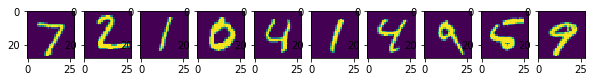

In [27]:
# launch the execution graph
start_time=time.time()
with tf.Session() as sess:
    sess.run(init)
    for i in range(epoches):
        for j in range(int(num_batches)):
            batch_x, batch_y=mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x:batch_x, y:batch_y, keep_prob:dropout})
            loss, acc=sess.run([cost, accuracy], feed_dict={x:batch_x, y:batch_y, keep_prob: 1.})
            if epoches % display_step==0:
                print('Epoch: ', '%04d' %(i+1), 
                "cost=", "{:.9f}".format(loss),
                "Training accuracy", "{:.5f}".format(acc))
    print('Optimization Completed')
    
    y1=sess.run(pred, feed_dict={x:mnist.test.images[:256], keep_prob:1})
    test_classes=np.argmax(y1, 1)
    print('Testing Accuracy: ', sess.run(accuracy, feed_dict={x:mnist.test.images[:256], y:mnist.test.labels[:256], keep_prob:1}))
    f, a = plt.subplots(1, 10, figsize=(10, 2))
    
    for i in range(10):
        a[i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        print(test_classes[i])
        
end_time=time.time()
print('Total processing time: ', end_time- start_time)